# Predicting Survival on the Titanic with a Perceptron Model

## Introduction

The sinking of the RMS Titanic is one of the most tragic maritime disasters in history. Using data from passengers and crew, this notebook aims to employ a Perceptron model to predict survival outcomes. This task involves processing a dataset with both numerical and categorical variables, handling missing data, standardizing inputs, and using a simple machine learning model to infer patterns.

In [64]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Exploration

Before preprocessing and modeling, let's examine the structure of the dataset, identify missing values, and understand the type of data available.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: title={'center': 'Survival Distribution'}>

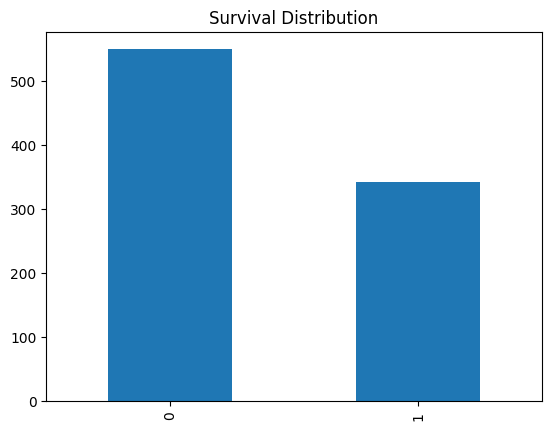

In [65]:
# Display dataset information to find any missing values and data types
titanic_df.info()

# Summary statistics for numerical features
titanic_df.describe()

# Count the distribution of the 'survived' target variable
titanic_df['survived'].value_counts().plot(kind='bar', title='Survival Distribution')

## Data Preprocessing

Effective preprocessing improves model performance. We'll handle missing values, encode categorical variables, and scale numerical features.

In [66]:
# Define columns by type
numerical_cols = ['age', 'fare', 'sibsp', 'parch']
categorical_cols = ['sex', 'embarked', 'pclass']

# Create preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numerical data
    ('scaler', StandardScaler())                 # Normalize numerical data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # Convert categorical data to one-hot vectors
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a preprocessing and training pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', Perceptron(max_iter=1000, tol=1e-3))
])

## Model Training

With preprocessing defined, we now train our Perceptron model using the prepared pipeline.

In [67]:
# Split the data into training and test sets
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
              

## Model Evaluation

Let's evaluate the model performance with standard classification metrics.

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions and evaluate the model
y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7541899441340782
Confusion Matrix:
 [[79 26]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       105
           1       0.68      0.76      0.72        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.76       179



## Visualization

To better understand the model's performance, we visualize the confusion matrix and the Receiver Operating Characteristic (ROC) curve. These visualizations help illustrate the model's effectiveness in classifying the survival outcomes and highlight any potential areas for improvement.

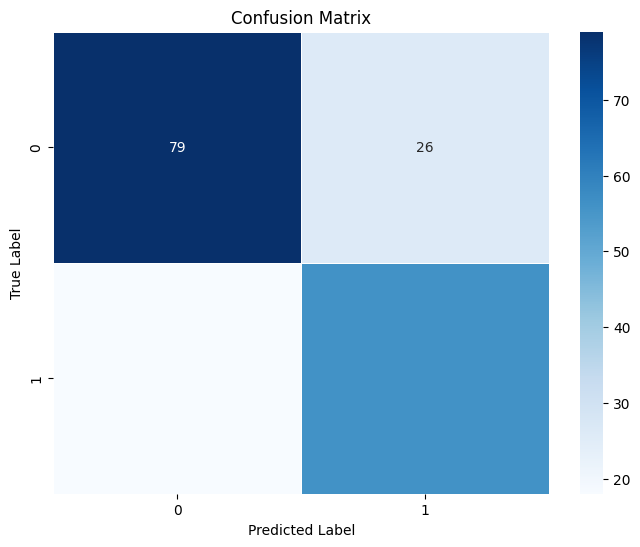

In [69]:
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

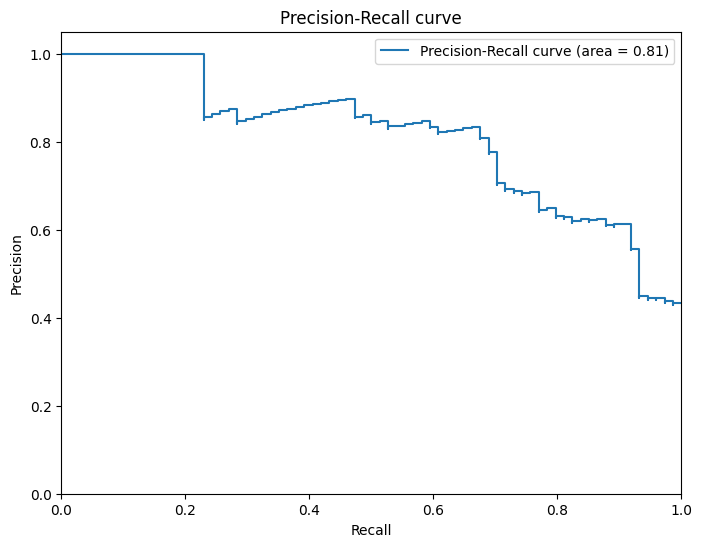

In [70]:
from sklearn.metrics import roc_curve, auc, plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model_pipeline.decision_function(X_test))

# Calculate average precision
average_precision = average_precision_score(y_test, model_pipeline.decision_function(X_test))

# Plotting the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'Precision-Recall curve (area = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="upper right")
plt.show()

## Conclusion

### Model's Performance Overview
The analysis using the Perceptron model on the Titanic dataset yields an accuracy of approximately 75.4%, with the confusion matrix and precision-recall curve providing deeper insights:

- **Confusion Matrix**: Our model correctly identified 79 non-survivors and 56 survivors. However, the presence of 26 false positives and 18 false negatives indicates a tendency of the model to predict survival more often than it should. This can be problematic, particularly if such a model were to be relied upon in safety-critical applications where predicting non-survival accurately is as crucial as predicting survival.

- **Precision-Recall Curve**: The curve begins with a high level of precision, signifying that the model is highly confident and usually correct when it predicts survival. However, as recall increases, precision decreases. The area under the curve is 0.81, which indicates a good level of separability between the classes. This is a positive aspect, but the decline in precision suggests a need to balance the trade-off between recall and precision better.

### Key Observations and Implications
- The model is more precise in predicting non-survival outcomes, which could indicate a bias due to an imbalance in the training data or an inherent characteristic of the model itself.
- The balanced distribution of false positives and false negatives demonstrates that the model does not excessively favor one class over the other, a desirable feature in classification tasks.

### Strategies for Model Improvement
- **Feature Engineering**: There is a need to explore the features further and potentially engineer new ones that could provide the model with more discriminative power.
- **Model Optimization**: Experimenting with different thresholds and decision functions could improve the precision-recall balance.
- **Alternative Models**: Given that the Perceptron is a basic linear classifier, employing more complex models such as logistic regression or decision trees might capture complex relationships in the data better.
- **Class Imbalance**: Applying techniques such as SMOTE (Synthetic Minority Over-sampling Technique) for the minority class or adjusting class weights could help in achieving better precision for the positive class.

### Final Thoughts
The analysis clearly indicates both the utility and the limitations of the Perceptron model in predicting Titanic survivors. While the model provides a solid foundation and fair predictive power, there is considerable room for improvement, especially in enhancing precision without sacrificing recall. Future efforts should focus on a more nuanced approach to model selection, feature engineering, and threshold optimization to enhance the predictive quality of the model.

In addressing class imbalance and refining the model's predictive abilities, we can aim to develop a more robust and reliable classification system for this historical dataset and, by extension, for similar binary classification challenges.
